# Second code:
- Move to First DataSet if you have not yet read it
  - Some descriptions are not included here, as it is not the main code and repeatedfrom First Dataset
- We then moved on to the second dataset
  - (The csv file for the second dataset was too large to upload to Github, was shortened to 20'000 rows)
  - (Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Segment_-_2011-2018.csv)


#### Importing Libraries and importing Dataset:

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import pandas as pd

df = pd.read_csv('Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Segment_-_2011-2018.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TIME                       19999 non-null  object 
 1   SEGMENTID                  19999 non-null  int64  
 2   BUS COUNT                  19999 non-null  float64
 3   MESSAGE COUNT              19999 non-null  float64
 4   SPEED                      19999 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 781.3+ KB


#### Cleaning dataset:
  - The first problem we faced was that the dataset had too many rows and would not load when we tried to perform any function on it, therefore, we needed to shorten it.

In [30]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()
df_short = df[1:20000]

TIME                         0
SEGMENTID                    0
BUS COUNT                    0
MESSAGE COUNT                0
SPEED                        0
dtype: int64


#### Preparing dataset:
  - We then printed the correlation matrix to find that the columns are not related in anyway possible
  - We decided to remove SEGMENTID because it was too stray from the data

                           SEGMENTID  BUS COUNT                  \
SEGMENTID                   1.000000                   0.020567   
BUS COUNT                   0.020567                   1.000000   
MESSAGE COUNT              -0.002924                   0.847250   
SPEED                      -0.113203                   0.514279   

                           MESSAGE COUNT     SPEED  
SEGMENTID                      -0.002924 -0.113203  
BUS COUNT                       0.847250  0.514279  
MESSAGE COUNT                   1.000000  0.377754  
SPEED                           0.377754  1.000000  


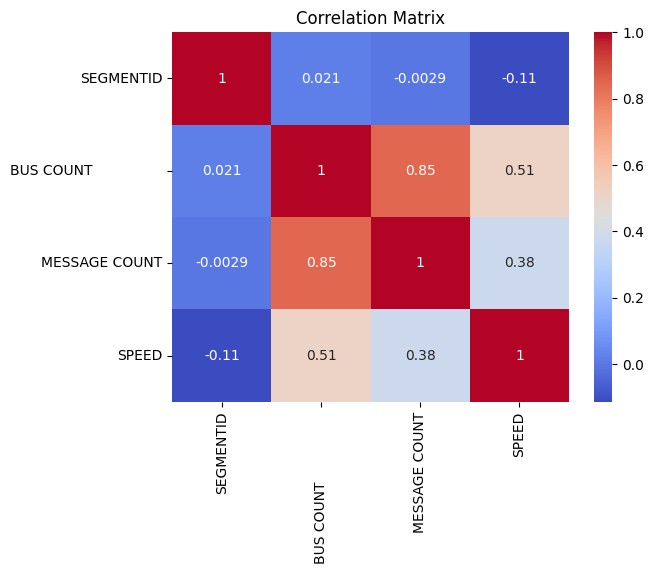

In [32]:
# Drop unwanted column
df_corr_input = df_short.drop(columns=['TIME'])

# Compute correlation matrix
corr_matrix = df_corr_input.corr()

# Print for confirmation
print(corr_matrix)

# Plot the actual correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Transforming datetime to timestamp:

In [33]:
from datetime import datetime

def time_convert(dt_str):
  dt_obj=datetime.strptime(dt_str, '%m/%d/%Y %H:%M:%S %p')
  timestamp=int(dt_obj.timestamp())
  return timestamp

my_datetime = df_short['TIME']
Y=[]
for t in my_datetime:
  y=time_convert(t)
  Y.append(y)

In [34]:
print(df_short.columns.tolist())

['TIME', 'SEGMENTID', 'BUS COUNT                ', 'MESSAGE COUNT', 'SPEED']


#### Taking needed columns for model:
- After converting the time to a numerical value, we created a dataframe with the new columns and dropped SEGMENTID as mentioned before

In [35]:
data = {
    'TIME': Y,
    'BUS COUNT': df_short["BUS COUNT                "],
    'MESSAGE COUNT': df_short["MESSAGE COUNT"]
}

df_adjusted = pd.DataFrame(data)

#### Scaling data for model:
- We then trained the model and created 4 clusters only unlike the previous dataset
- Then we printed the scatter plot to find that it gave a very confusing result

In [36]:
# Scale features (important for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_adjusted)
print(scaled_data)

[[-0.85618076 -0.73862037 -0.64979079]
 [-0.83829304 -0.04138505 -0.21377709]
 [ 1.0876179  -0.73862037 -0.64979079]
 ...
 [ 1.13829977 -0.04138505 -0.32278052]
 [-0.83531176 -0.73862037 -0.64979079]
 [-0.8263679  -0.73862037 -0.64979079]]


#### Training model:

In [37]:
k=4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(len(labels))
print(centroids)

19998
[[ 1.12302785 -0.2609811  -0.24724134]
 [-0.88947768 -0.28887923 -0.28323418]
 [ 0.08211543  5.75723028  6.01585079]
 [-0.14548178  1.4161233   1.33317562]]


#### Visualizing clusters:
- The clusters did not make any sense no matter how much we added nor removed because the data was organized very weirdly and was too separated to visualize
- We hypothesize that this weird result is due to the columns being too uncorrelated and the data itself having many wrong or far readings
- This data needs thorough cleaning from data science specialists
- We decided to not continue with thai dataset as the predictions would be even more confusing and incorrect


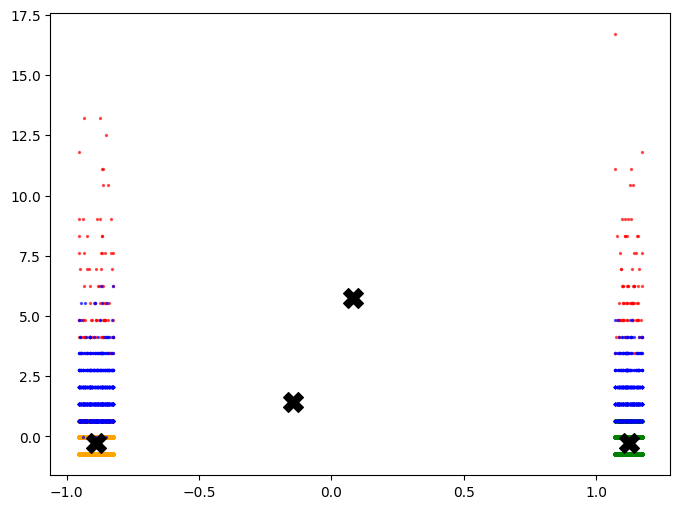

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
colors = ['green','orange','red','blue']
zone_labels = ['Very Low Congestion','Low Congestion','High Congestion','Very High Congestion']
for i in range (k):
  plt.scatter(scaled_data[labels == i][:,0],scaled_data[labels==i][:,1], c=colors[i],label=zone_labels[i], s=2,alpha=0.6)

plt.scatter(centroids[:,0],centroids[:,1],c='black',s=200,marker='X',label='Centroids')
